# Credit Card Fraud Detection

## The Data   

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.   
Can be found here: https://www.kaggle.com/mlg-ulb/creditcardfraud

## The goal of the Project

For this project, we'll use everything we've learned about Data Science and Machine Learning thus far to source a dataset, preprocess and explore it, and then build and interpret a classification model that answers your chosen question.

Our goal is to predict if a transaction was fraudulent or not.

In [1]:
# basic libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

# display options
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

# date
from datetime import datetime 

# visualizations libraries
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# ML libraries
import itertools
from collections import Counter
from sklearn.datasets import make_classification
from numpy import where

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE

from sklearn.svm import SVC # Support Vector Machine Classifier
from sklearn.metrics import precision_score, recall_score,confusion_matrix, classification_report, accuracy_score, f1_score  # Skearns Metrics
from sklearn.neighbors import KNeighborsClassifier # KNN Classifier
from xgboost import XGBClassifier # Boosting Algo
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc # Comparing Various Classifiers
from sklearn.tree import DecisionTreeClassifier

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



In [3]:
df = pd.read_csv('creditcard.csv')

## Preview the data

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Split to train and test sets (not normalised data)

In [5]:
y = df['Class']
X = df.drop(columns=['Class'], axis=1)

In [6]:
print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Data Shapes:")
print(f"X_train: {X_train.shape} | X_test: {X_test.shape} | y_train {y_train.shape} | y_test {y_test.shape}")

Data Shapes:
X_train: (199364, 30) | X_test: (85443, 30) | y_train (199364,) | y_test (85443,)


In [8]:
print(f"Number of Frauds in Train Set: {y_train.sum()}")
print(f"Number of Frauds in Test Set: {y_test.sum()}")

Number of Frauds in Train Set: 356
Number of Frauds in Test Set: 136


## Split the train set to train and validation sets

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
print(f"X_train: {X_train.shape} | X_val: {X_val.shape} | y_train {y_train.shape} | y_val {y_val.shape}")

X_train: (139554, 30) | X_val: (59810, 30) | y_train (139554,) | y_val (59810,)


In [10]:
print(f"Number of Frauds in Train: {y_train.sum()}")
print(f"Number of Frauds in Validation: {y_val.sum()}")

Number of Frauds in Train: 258
Number of Frauds in Validation: 98


In [11]:
# Training set
print(y_train.value_counts())
print('\n')
# Validation set
print(y_val.value_counts())

0    139296
1       258
Name: Class, dtype: int64


0    59712
1       98
Name: Class, dtype: int64


## Functions

In [12]:
# Print scores and heatmap
def scores(y_val,prediction):
    cm = confusion_matrix(y_val, prediction)
    recall = np.diag(cm) / np.sum(cm, axis = 1)
    precision = np.diag(cm) / np.sum(cm, axis = 0)
    
    print ('Recall:', recall)
    print ('Precision:', precision)
    print ('\n clasification report:\n', classification_report(y_val,prediction))
    print ('\n confussion matrix:\n',confusion_matrix(y_val, prediction))
    print('\n Accuracy Percentage  is : {}%'.format(accuracy_score(y_val,prediction) * 100))
    
    fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
    sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths= 0.5, cmap='PuRd')
    plt.title('Confusion Matrix', fontsize=14)
    plt.show()

## Create a baseline (non normalised data)

For a baseline model do a Logistic Regression model

Recall: [0.99981578 0.63265306]
Precision: [0.99939736 0.84931507]

 clasification report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00     59712
          1       0.85      0.63      0.73        98

avg / total       1.00      1.00      1.00     59810


 confussion matrix:
 [[59701    11]
 [   36    62]]

 Accuracy Percentage  is : 99.92141782310651%


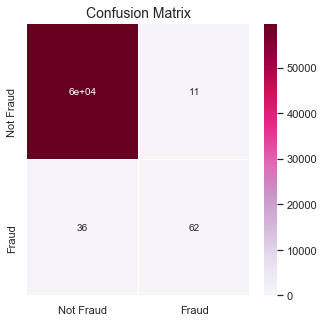

In [14]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)
scores(y_val,y_pred);

## Scaling

As the data description says, all our features have been PCA transformed except 'Time' and 'Amount'. So we are scaling only these two columns:

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
df.Amount = scaler.fit_transform((df.Amount).values.reshape(-1,1))
df.Time = scaler.fit_transform((df.Time).values.reshape(-1,1))

In [17]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


## SMOTE

I'm going to use the SMOTE class from the imblearn package in order to improve the model's performance on the minority class.   

In [18]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)

In [19]:
# Previous original class distribution
print(y_train.value_counts()) 

# Fit SMOTE to training data
X_train, y_train = SMOTE().fit_sample(X_train, y_train) 

# Preview synthetic sample class distribution
print('\n')
print(pd.Series(y_train).value_counts()) 

0    139296
1       258
Name: Class, dtype: int64


1    139296
0    139296
dtype: int64


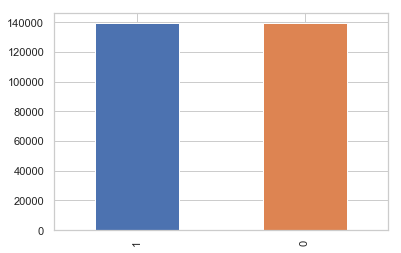

In [20]:
# observe that data has been balanced
pd.Series(y_train).value_counts().plot.bar()

Accuracy = (TP+TN)/total  
Precision = TP/(TP+FP)  
Recall = TP/(TP+FN)  

In [21]:
# Print metrics
def print_metrics(labels, preds):
    print('Precision Score: {}'.format(precision_score(labels, preds)))
    print('Recall Score: {}'.format(recall_score(labels, preds)))
    print('Accuracy Score: {}'.format(accuracy_score(labels, preds)))
    print('F1 Score: {}'.format(f1_score(labels, preds)))
    
# print_metrics(y_val, test_preds)

In [22]:
# def train(clf, X_train, y_train, X_val, y_val):
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_val)
#     acc(y_pred,y)
#     return y_pred

## Logistic Regression

Recall: [0.98658561 0.85714286]
Precision: [0.99976241 0.09491525]

 clasification report:
              precision    recall  f1-score   support

          0       1.00      0.99      0.99     59712
          1       0.09      0.86      0.17        98

avg / total       1.00      0.99      0.99     59810


 confussion matrix:
 [[58911   801]
 [   14    84]]

 Accuracy Percentage  is : 98.63735161344258%


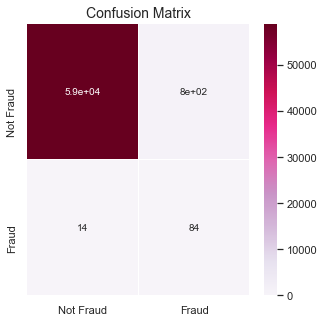

In [23]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)
scores(y_val,y_pred);

## KNN

Recall: [0.93163853 0.52040816]
Precision: [0.99915585 0.0123397 ]

 clasification report:
              precision    recall  f1-score   support

          0       1.00      0.93      0.96     59712
          1       0.01      0.52      0.02        98

avg / total       1.00      0.93      0.96     59810


 confussion matrix:
 [[55630  4082]
 [   47    51]]

 Accuracy Percentage  is : 93.09647216184584%


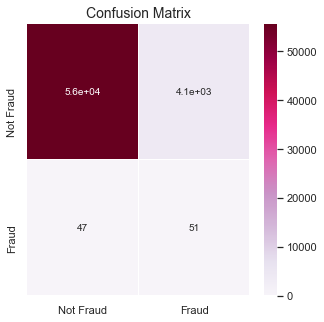

In [24]:
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_val)
scores(y_val,y_pred);

Recall: [0.94349544 0.53061224]
Precision: [0.99918417 0.01517805]

 clasification report:
              precision    recall  f1-score   support

          0       1.00      0.94      0.97     59712
          1       0.02      0.53      0.03        98

avg / total       1.00      0.94      0.97     59810


 confussion matrix:
 [[56338  3374]
 [   46    52]]

 Accuracy Percentage  is : 94.28189266009028%


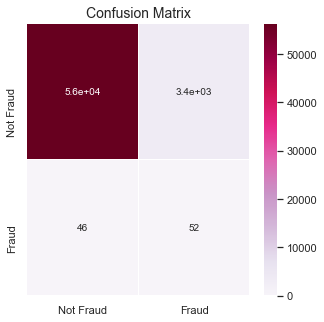

In [25]:
# NN = 3
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_val)
scores(y_val,y_pred);

Recall: [0.92410236 0.51020408]
Precision: [0.99913088 0.01091227]

 clasification report:
              precision    recall  f1-score   support

          0       1.00      0.92      0.96     59712
          1       0.01      0.51      0.02        98

avg / total       1.00      0.92      0.96     59810


 confussion matrix:
 [[55180  4532]
 [   48    50]]

 Accuracy Percentage  is : 92.34241765591038%


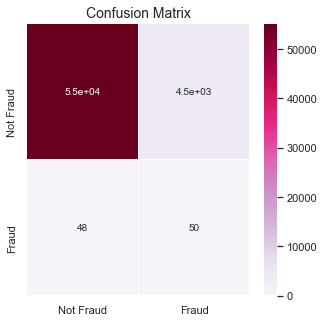

In [26]:
# NN = 7
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_val)
scores(y_val,y_pred);

### I need numpy array

In [27]:
print(type(X_train))
print(type(X_val))
print(type(y_train))
print(type(y_val))

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [28]:
X_val = X_val.values
y_val = y_val.values
print(type(X_val))
print(type(y_val))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## XGBoost

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



Recall: [0.99775589 0.85714286]
Precision: [0.99976507 0.3853211 ]

 clasification report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00     59712
          1       0.39      0.86      0.53        98

avg / total       1.00      1.00      1.00     59810


 confussion matrix:
 [[59578   134]
 [   14    84]]

 Accuracy Percentage  is : 99.752549740846%


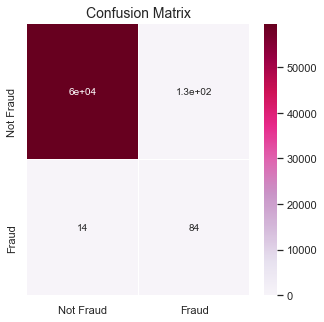

In [29]:
xgb = XGBClassifier(max_depth=5, n_jobs=-1)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_val)
scores(y_val,y_pred);

## Decision Tree

Recall: [0.99755493 0.80612245]
Precision: [0.99968113 0.35111111]

 clasification report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00     59712
          1       0.35      0.81      0.49        98

avg / total       1.00      1.00      1.00     59810


 confussion matrix:
 [[59566   146]
 [   19    79]]

 Accuracy Percentage  is : 99.72412640026751%


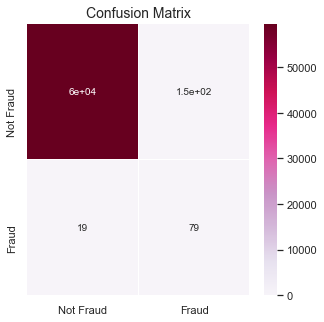

In [30]:
d_tree = DecisionTreeClassifier(random_state=10)  
d_tree.fit(X_train, y_train) 

y_pred = d_tree.predict(X_val)
scores(y_val,y_pred);

## Random Forest Classifier

Recall: [0.99974879 0.81632653]
Precision: [0.99969857 0.84210526]

 clasification report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00     59712
          1       0.84      0.82      0.83        98

avg / total       1.00      1.00      1.00     59810


 confussion matrix:
 [[59697    15]
 [   18    80]]

 Accuracy Percentage  is : 99.94482528005351%


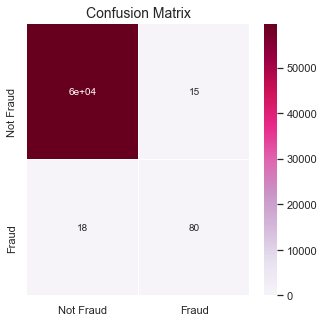

In [31]:
r_for = RandomForestClassifier(random_state=0)
r_for.fit(X_train, y_train)

y_pred = r_for.predict(X_val)
scores(y_val,y_pred);

## Support Vector Machines (SVM)

In [ ]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

In [ ]:
y_pred = svc.predict(X_val)
scores(y_val,y_pred);